## Lead Scoring Case Study

### Problem Statement

#### An X education comapny sells online course to industry professionals. The company needs to identify the Potential lead to increase their conversion rate. The model is to be build a model in which a lead score is given to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. 
#### The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

#### Goals and Objectives of Case Study
#### 1. Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
#### 2. There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

### Step 1: Importing and Merging Data

In [1]:
# Importing Pandas and NumPy
import pandas as pd
import numpy as np

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

# visualizing libraries
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.svm import SVC

#### 1.2 Reading and Understanding the dataset

In [2]:
# reading dataset
lead_case = pd.read_csv('Leads.csv')
lead_case.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
lead_case.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [4]:
# shape of datafram
lead_case.shape

(9240, 37)

In [5]:
lead_case.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


##### we can see that there might be some outliers as maximum values for some columns are far more than their average or mean values. Picture will be more clear while cleaning the data.

#### 1.2 Data Cleaning and Data Preparation

In [6]:
## checking for duplicates
sum(lead_case.duplicated(subset = 'Prospect ID'))

0

##### as the sum of duplicates for 'Prospect ID' is zero, there are no duplicate values in datafram.

In [7]:
## converting 'Select' values to 'NaN'
lead_case = lead_case.replace('Select', np.nan)

In [8]:
# checking for null values
lead_case.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [9]:
# checking null values in percentage
round(100*(lead_case.isnull().sum()/len(lead_case.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

##### we can see that there much more null values in certain columns. Columns with percentage of more than 40% can be dropped.

In [10]:
# dropping columns with more than 40% null values.
drop_cols = lead_case.columns
for i in drop_cols:
    if round(100*(lead_case[i].isnull().sum()/len(lead_case.index)), 2) >= 40:
        lead_case.drop(i, 1, inplace = True)

In [11]:
## checking for null values after dropping columns 
round(100*(lead_case.isnull().sum()/len(lead_case.index)), 2).sort_values(ascending = False)

City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Through Recommendations                           0.00
Receive More Updates About Our Courses            0.00
Prospect ID                                       0.00
Newspaper                                         0.00
Update me on Supply Chain Content                 0.00
Get updates on DM Content                         0.00
I agree to pay the amount through cheque          0.00
A free copy of Mastering The Interview            0.00
Digital Ad

In [12]:
# checking for city
lead_case['City'].value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [13]:
# defining a functio to plot the countplot with hue
def count_plot(column_name):
    plt.figure(figsize=(15,3))
    ax = sns.countplot(column_name, hue = lead_case['Converted'])
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
    plt.show()

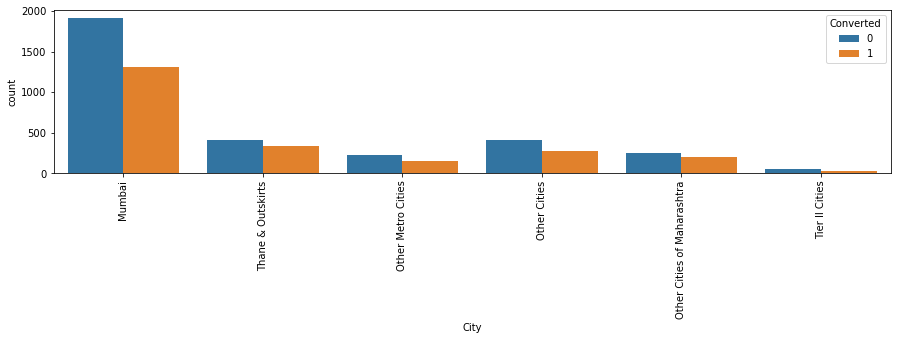

In [14]:
count_plot(lead_case['City'])

In [15]:
#replacing Nan values with 'Mumbai'
lead_case['City'] = lead_case['City'].replace(np.nan, 'Mumbai')

In [16]:
#checking for null values in City again
lead_case['City'].isnull().sum()

0

In [17]:
# checking for country
lead_case['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [18]:
# As India is most common country, we can impute missing values with 'India'
lead_case['Country'] = lead_case['Country'].replace(np.nan, 'India')

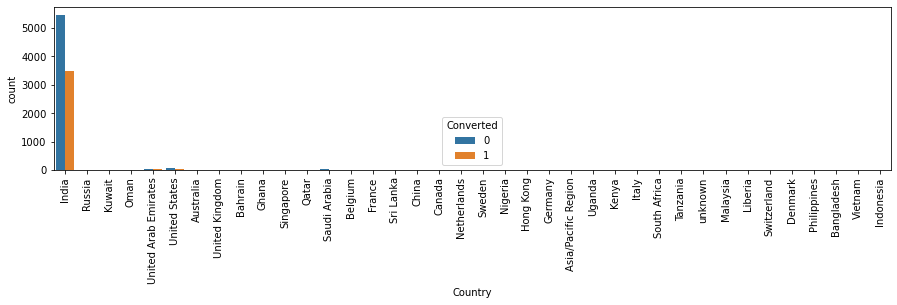

In [19]:
count_plot(lead_case['Country'])

##### from the hue created, it is clearly seen that 'India' has more number of leads converted. Also there are more number of interested people from India. Later we can drop the column 'Country' as the education company is online and it will not play important role.

In [20]:
# checking for specialization
lead_case['Specialization'].value_counts(dropna= False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [21]:
#imputing NaN values with 'Other'
lead_case['Specialization'] = lead_case['Specialization'].replace(np.nan, 'Other')

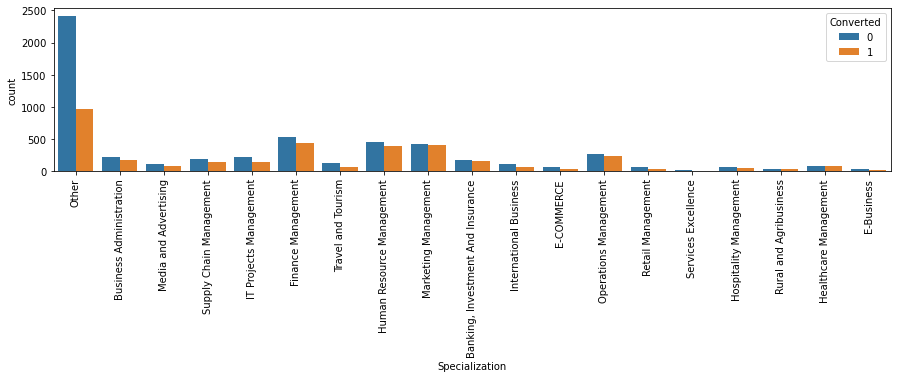

In [22]:
count_plot(lead_case['Specialization'])

In [23]:
# we can see from above plot that, other than the 'Other' specialization, there are more leads in the various
# branches of 'Management'. Hence merging them will simplifi the work
lead_case['Specialization'] = lead_case['Specialization'].replace(['Supply Chain Management', 'IT Projects Management'
                                                                  ,'Finance Management', 'Human Resource Management', 
                                                                   'Marketing Management', 'Operations Management', 
                                                                   'Retail Management', 'Hospitality Management', 
                                                                   'Healthcare Management'], 'Management')

In [24]:
lead_case['Specialization'].value_counts()

Management                           4253
Other                                3380
Business Administration               403
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
E-COMMERCE                            112
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [25]:
#checking Tags
lead_case['Tags'].value_counts(dropna = False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [26]:
lead_case['Tags'] = lead_case['Tags'].replace(np.nan, 'Not_Mentioned')

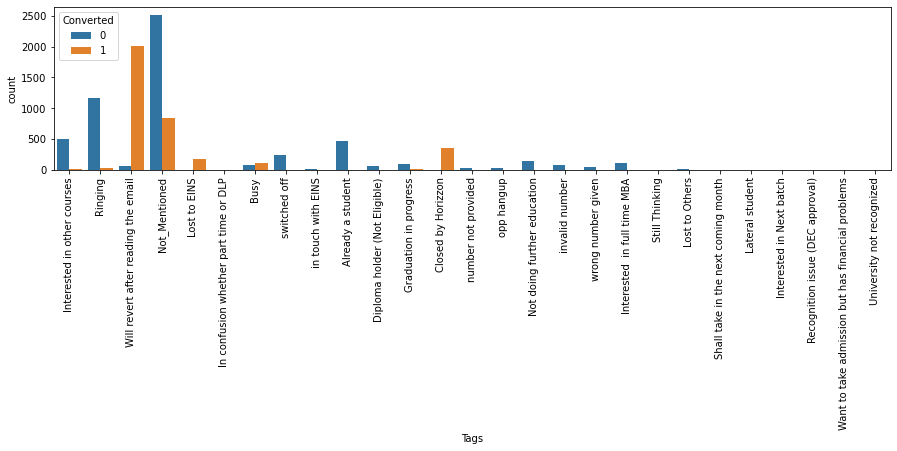

In [27]:
count_plot(lead_case['Tags'])

##### for the column 'Tags', there are much more variables. Merging variables with low frequency to one variable, 'Others' will make it more simpler. every category should have 5% of total data. Hence merging them will make this condition true.

In [28]:
lead_case['Tags']=lead_case['Tags'].replace(['Closed by Horizzon','switched off','Busy','invalid number',
                                              'Not doing further education','Lost to EINS','Lost to Others',
                                              'Interested  in full time MBA','Graduation in progress',
                                              'Diploma holder (Not Eligible)','wrong number given','opp hangup',
                                              'number not provided','in touch with EINS','Still Thinking',
                                              'Want to take admission but has financial problems',
                                             'In confusion whether part time or DLP','Interested in Next batch',
                                             'Lateral student','Shall take in the next coming month',
                                             'University not recognized','Recognition issue (DEC approval)'],
                                            'Others')

In [29]:
lead_case['Tags'].value_counts()

Not_Mentioned                          3353
Will revert after reading the email    2072
Others                                 1634
Ringing                                1203
Interested in other courses             513
Already a student                       465
Name: Tags, dtype: int64

In [30]:
#checking What matters most to you in choosing a course
lead_case['What matters most to you in choosing a course'].value_counts(dropna= False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [31]:
# replacing NaN with Better Career Prospects
lead_case['What matters most to you in choosing a course'] =lead_case['What matters most to you in choosing a course'].replace(np.nan,
                                                                                                                               'Better Career Prospects')

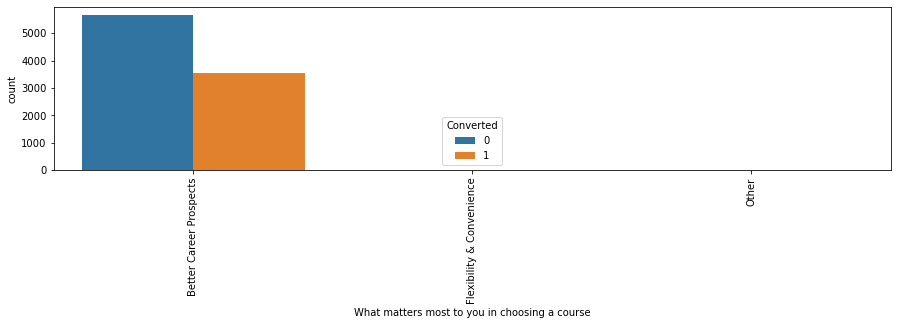

In [32]:
count_plot(lead_case['What matters most to you in choosing a course'])

###### as mentioned earlier, we have to drop column 'Country'. Also for column 'What matters most to you in choosing a course', there is high variation between categories. Hence we can drop it.

In [33]:
# dropping 'Country' and 'What matters most to you in choosing a course'
lead_case = lead_case.drop(['Country', 'What matters most to you in choosing a course'], axis=1)

In [34]:
#checking for info of dataframe
lead_case.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 28 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Prospect ID                               9240 non-null   object 
 1   Lead Number                               9240 non-null   int64  
 2   Lead Origin                               9240 non-null   object 
 3   Lead Source                               9204 non-null   object 
 4   Do Not Email                              9240 non-null   object 
 5   Do Not Call                               9240 non-null   object 
 6   Converted                                 9240 non-null   int64  
 7   TotalVisits                               9103 non-null   float64
 8   Total Time Spent on Website               9240 non-null   int64  
 9   Page Views Per Visit                      9103 non-null   float64
 10  Last Activity                       

In [35]:
# checking What is your current occupation
lead_case['What is your current occupation'].value_counts(dropna= False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [36]:
lead_case['What is your current occupation']=lead_case['What is your current occupation'].replace(np.nan,
                                                                                                  'Unemployed')

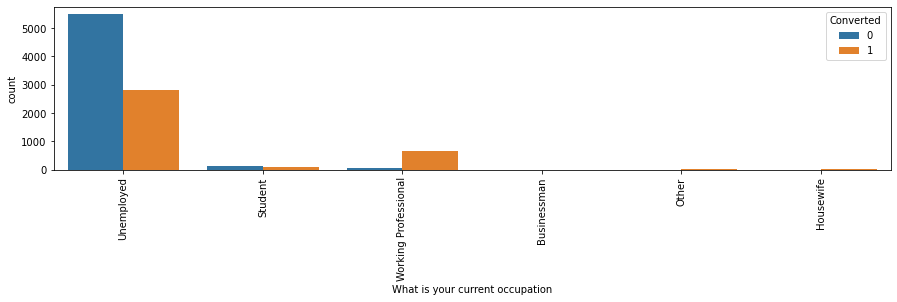

In [37]:
count_plot(lead_case['What is your current occupation'])

##### we can see that 'unemployed' category may have high chances to get the course and it also have high conversion rate. Also 'Working Professional' category also has higher conversion rate. Hence this column is useful for further analysis.

In [38]:
# checking Last Activity
lead_case['Last Activity'].value_counts(dropna= False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [39]:
#replacing NaN values and combining low frequency categories to 'Other'
lead_case['Last Activity'] = lead_case['Last Activity'].replace(np.nan, 'Other')
lead_case['Last Activity'] = lead_case['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                                 'Had a Phone Conversation','Approached upfront',
                                                                'View in browser link Clicked','Email Received',
                                                                'Email Marked Spam','Visited Booth in Tradeshow',
                                                                'Resubscribed to emails'],'Other')

In [40]:
lead_case['Last Activity'].value_counts(dropna= False)

Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Other                         308
Email Link Clicked            267
Form Submitted on Website     116
Name: Last Activity, dtype: int64

In [41]:
#checking Lead Source
lead_case['Lead Source'].value_counts(dropna= False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [42]:
lead_case['Lead Source'] = lead_case['Lead Source'].replace('google', 'Google')
lead_case['Lead Source'] = lead_case['Lead Source'].replace(np.nan, 'Other')
lead_case['Lead Source'] = lead_case['Lead Source'].replace(['bing','Click2call','Press_Release','Social Media',
                                                            'Live Chat','youtubechannel','testone','blog','NC_EDM',
                                                             'Pay per Click Ads','welearnblog_Home','WeLearn'],
                                                            'Other')

In [43]:
lead_case['Lead Source'].value_counts(dropna= False)

Google              2873
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Other                 59
Facebook              55
Name: Lead Source, dtype: int64

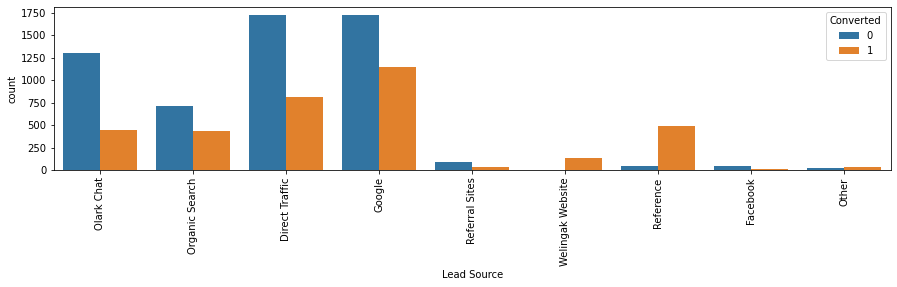

In [44]:
count_plot(lead_case['Lead Source'])

##### most number of leads are from source 'Google' and 'Diret Traffic'. Also conversion for 'Reference' and 'Welingak Website' is more. Conversion rate can be increased by focusing more on 'Olark Chat', 'Organic Search', 'Google' and 'direct traffic'

In [45]:
# checking for null values of data frame
round(100*(lead_case.isnull().sum()/len(lead_case.index)), 2).sort_values(ascending = False)

TotalVisits                                 1.48
Page Views Per Visit                        1.48
Prospect ID                                 0.00
Newspaper Article                           0.00
A free copy of Mastering The Interview      0.00
I agree to pay the amount through cheque    0.00
City                                        0.00
Get updates on DM Content                   0.00
Update me on Supply Chain Content           0.00
Tags                                        0.00
Receive More Updates About Our Courses      0.00
Through Recommendations                     0.00
Digital Advertisement                       0.00
Newspaper                                   0.00
X Education Forums                          0.00
Magazine                                    0.00
Lead Number                                 0.00
Search                                      0.00
What is your current occupation             0.00
Specialization                              0.00
Last Activity       

##### we can drop that rows having null values less than 2% as it will not affect the model.

In [46]:
lead_case = lead_case.dropna()

In [47]:
# checking for null values of data frame
round(100*(lead_case.isnull().sum()/len(lead_case.index)), 2).sort_values(ascending = False)

Prospect ID                                 0.0
Lead Number                                 0.0
A free copy of Mastering The Interview      0.0
I agree to pay the amount through cheque    0.0
City                                        0.0
Get updates on DM Content                   0.0
Update me on Supply Chain Content           0.0
Tags                                        0.0
Receive More Updates About Our Courses      0.0
Through Recommendations                     0.0
Digital Advertisement                       0.0
Newspaper                                   0.0
X Education Forums                          0.0
Newspaper Article                           0.0
Magazine                                    0.0
Search                                      0.0
What is your current occupation             0.0
Specialization                              0.0
Last Activity                               0.0
Page Views Per Visit                        0.0
Total Time Spent on Website             

In [48]:
# checking for Last Notabel Activity
lead_case['Last Notable Activity'].value_counts()

Modified                        3270
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [49]:
#combining low frequency categories to Other
lead_case['Last Notable Activity'] = lead_case['Last Notable Activity'].replace(
    ['Email Bounced','Unsubscribed','Had a Phone Conversation','Email Marked Spam','Approached upfront',
     'Resubscribed to emails','View in browser link Clicked','Form Submitted on Website','Email Received'],'Other')

##### Still the datafram contains more number of columns, lets check for skewness of column so that columns with unique values and more skweness can be dropped.

In [50]:
for i in lead_case.columns:
    print(lead_case[i].value_counts())
    print('_________________________________')

7927b2df-8bba-4d29-b9a2-b6e0beafe620    1
51c534e0-8913-468b-9214-6487a55e1fae    1
65954c34-8ce7-4d9b-8ae0-f15f15bc9055    1
e02efa11-5bf6-40ee-9194-75d3fffef1d3    1
297fd0fa-69e5-49cf-b794-94c103e388d7    1
                                       ..
d27ecc9b-9176-47d5-a281-09a48af38749    1
bff6c61d-25e3-4b1e-bf17-b634c91f3e2f    1
c62678c1-e741-4874-b5cf-500b2e8e2a78    1
4e859886-6ae2-462b-abd0-1df6ae65d8bf    1
571b5c8e-a5b2-4d57-8574-f2ffb06fdeff    1
Name: Prospect ID, Length: 9103, dtype: int64
_________________________________
660737    1
602419    1
602453    1
602451    1
602442    1
         ..
630127    1
630128    1
630135    1
630139    1
579533    1
Name: Lead Number, Length: 9103, dtype: int64
_________________________________
Landing Page Submission    4886
API                        3578
Lead Add Form               608
Lead Import                  31
Name: Lead Origin, dtype: int64
_________________________________
Google              2873
Direct Traffic      2543
Ol

#### Observations
#### Columns with more skewness are: 
1. Do Not Email
2. Do Not Call
3. Search
4. Newspaper Article
5. X Education Forums
6. Newspaper
7. Digital Advertisement
8. Through Recommendations
#### Above columns needs to be dropped.

#### Columns with unique values are: 
1. Magazine
2. Receive More Updates About Our Courses
3. Update me on Supply Chain Content
4. Get updates on DM Content
5. I agree to pay the amount through cheque
#### Above columns needs to be dropped.

In [51]:
#dropping above mentioned columns
drop_cols = ['Do Not Call', 'Do Not Email', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
             'Digital Advertisement', 'Through Recommendations', 'Magazine', 
             'Receive More Updates About Our Courses', 'Update me on Supply Chain Content',
             'Get updates on DM Content', 'I agree to pay the amount through cheque']
lead_case.drop(drop_cols, axis=1, inplace=True)

In [52]:
lead_case.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 15 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9103 non-null   object 
 1   Lead Number                             9103 non-null   int64  
 2   Lead Origin                             9103 non-null   object 
 3   Lead Source                             9103 non-null   object 
 4   Converted                               9103 non-null   int64  
 5   TotalVisits                             9103 non-null   float64
 6   Total Time Spent on Website             9103 non-null   int64  
 7   Page Views Per Visit                    9103 non-null   float64
 8   Last Activity                           9103 non-null   object 
 9   Specialization                          9103 non-null   object 
 10  What is your current occupation         9103 non-null   obje

In [53]:
lead_case.shape

(9103, 15)

### 2. Data Visualization

In [54]:
## creating new df by dropping 'Prospect ID' and 'Lead Number' as they are unique identifiers
new_lead_case = lead_case.drop(['Prospect ID', 'Lead Number'], axis = 1)

In [55]:
new_lead_case.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9103 non-null   object 
 1   Lead Source                             9103 non-null   object 
 2   Converted                               9103 non-null   int64  
 3   TotalVisits                             9103 non-null   float64
 4   Total Time Spent on Website             9103 non-null   int64  
 5   Page Views Per Visit                    9103 non-null   float64
 6   Last Activity                           9103 non-null   object 
 7   Specialization                          9103 non-null   object 
 8   What is your current occupation         9103 non-null   object 
 9   Tags                                    9103 non-null   object 
 10  City                                    9103 non-null   obje

#### 2.1 Continuos Variable Analysis

In [56]:
# getting percentage of Target variable 0r 'Converted'
perc_converted = round((sum(new_lead_case['Converted']) / len(new_lead_case['Converted'].index))*100,2)
perc_converted

38.02

##### we can see the percentage of Converted leads to 1 is 38% which is good, but target to be achieved is 80%.

#### Finding the coorrelation between Continuous Variables

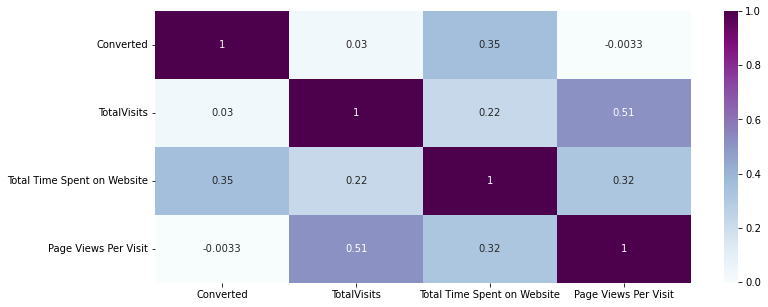

In [57]:
plt.figure(figsize = (12,5))
sns.heatmap(new_lead_case.corr(), cmap = 'BuPu', annot = True)
plt.show()

##### we can see that variable impacting on converted more is 'Total Time Spent on Website' as correlation coefficient is 0.35

<Figure size 864x216 with 0 Axes>

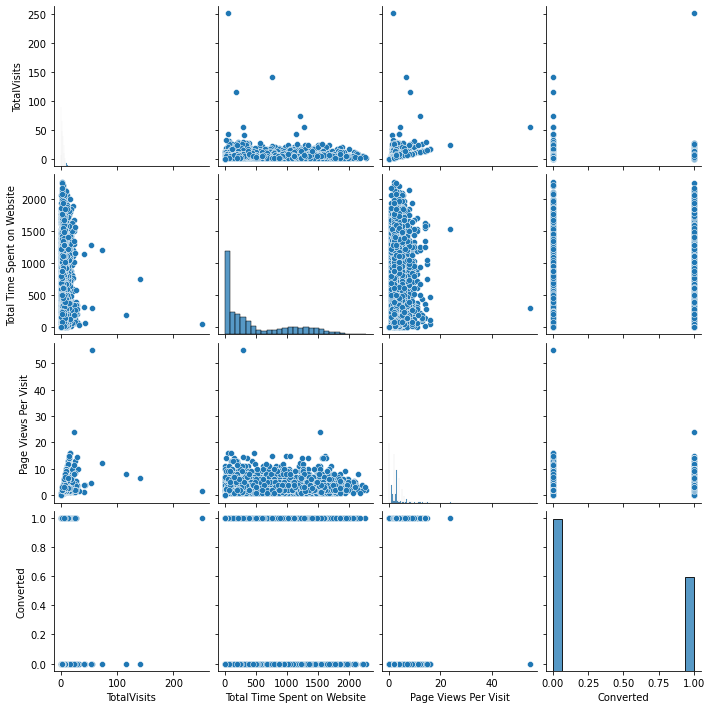

In [58]:
## visualizing numeric variables using pairplots
plt.figure(figsize = (12,3))
sns.pairplot(data = new_lead_case, vars=['TotalVisits','Total Time Spent on Website','Page Views Per Visit','Converted'])
plt.show()

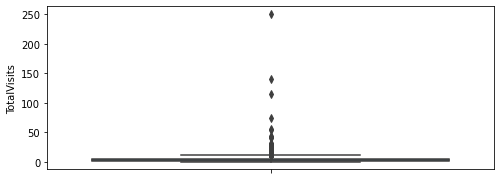

In [59]:
#Checking for box plot of all continuous variable one by one
# checking for Total Visits
plt.figure(figsize = (8,3))
sns.boxplot(y = new_lead_case['TotalVisits'])
plt.show()

In [60]:
new_lead_case['TotalVisits'].describe(percentiles =[.25, .5, .75, .90, .95, .99])

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

#### Here outlier treatment need to be done.

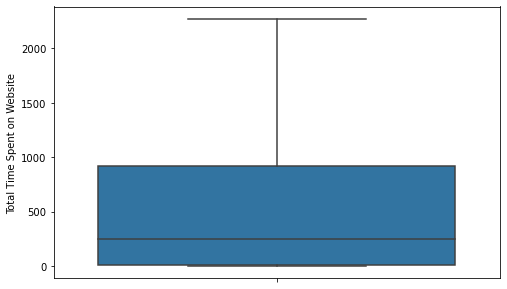

In [61]:
# checking for 'Total Time Spent on Website'
plt.figure(figsize = (8,5))
sns.boxplot(y = new_lead_case['Total Time Spent on Website'])
plt.show()

##### from above we can see that there are no outliers hence no need of outlier tratment.

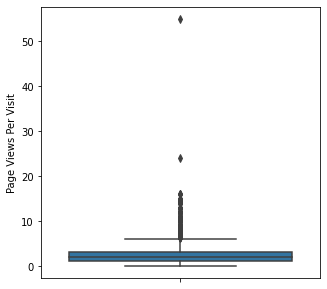

In [62]:
# checking for 'Page Views Per Visit'
plt.figure(figsize = (5,5))
sns.boxplot(y = new_lead_case['Page Views Per Visit'])
plt.show()

##### for above variable, outlier tratment need to be done.

##### Outlier Treatment

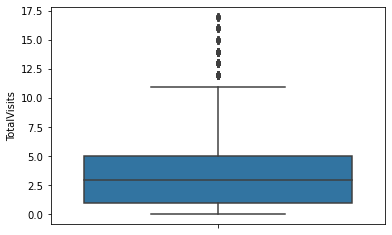

In [63]:
# 1. For Total Visits, Removing 1% from top and bottom 
# from top
Q3 = new_lead_case['TotalVisits'].quantile(0.99)
new_lead_case = new_lead_case[(new_lead_case['TotalVisits'] <= Q3)]

#from bottom
Q1 = new_lead_case['TotalVisits'].quantile(0.01)
new_lead_case = new_lead_case[(new_lead_case['TotalVisits'] >= Q1)]

#plotting graph to check the results
sns.boxplot(y=new_lead_case['TotalVisits'])
plt.show()

##### we can see that major proportion of outliers are removed.

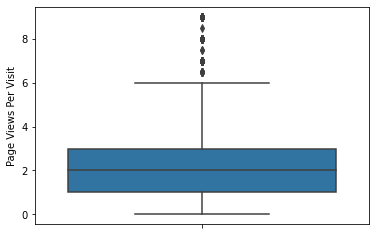

In [64]:
# 1. For Page Views Per Visit, Removing 1% from top and bottom 
# from top
Q3 = new_lead_case['Page Views Per Visit'].quantile(0.99)
new_lead_case = new_lead_case[(new_lead_case['Page Views Per Visit'] <= Q3)]

#from bottom
Q1 = new_lead_case['Page Views Per Visit'].quantile(0.01)
new_lead_case = new_lead_case[(new_lead_case['Page Views Per Visit'] >= Q1)]

#plotting graph to check the results
sns.boxplot(y=new_lead_case['Page Views Per Visit'])
plt.show()

##### we can see that major proportion of outliers are removed.

##### Analyzing Continuos variables with 'Converted'

In [65]:
# defining function
def plot_box(column_name):
    plt.figure(figsize = (5,4))
    sns.boxplot(data = new_lead_case, x = 'Converted', y = column_name)
    plt.show()

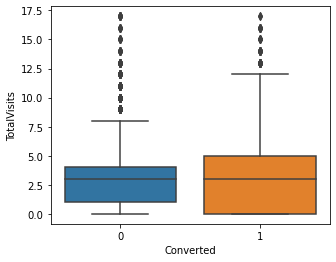

In [66]:
# 1. for TotalVisits
plot_box('TotalVisits')

##### We can see here that, conversion rate is higher for Total Visits. Also Median for Converted and Not converted is almost close.

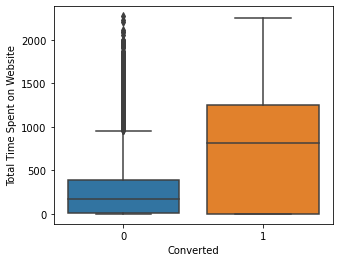

In [67]:
# for Total Time Spent on Website
plot_box('Total Time Spent on Website')

##### We can see that , conversion rate is much higher i.e. people who are spending more time on website are more likely to take admission to course. Hence, website made should be more engaging to increase the conversion rate.

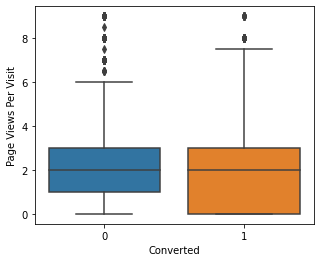

In [68]:
# for Page Views Per Visit
plot_box('Page Views Per Visit')

##### Nothing much can be predicted from above graph, the range of converted one is more and median for both Converted and Not Converted are almost same for this variable.

#### Creating dummy variables for Categorical variables

In [69]:
vars_cat = new_lead_case.select_dtypes(include=['object']).columns
vars_cat

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'What is your current occupation', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [70]:
## creating dummies for vars_cat
dummy_vars = pd.get_dummies(new_lead_case.select_dtypes(include=['object']), drop_first = True)
dummy_vars

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other,Lead Source_Reference,Lead Source_Referral Sites,...,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9236,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
9237,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
9238,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [71]:
# dropping original variables after creating dummies
lead_case_df = new_lead_case.drop(new_lead_case.select_dtypes(include=['object']).columns, axis=1)

lead_case_df = pd.concat([lead_case_df, dummy_vars], axis=1)
lead_case_df.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,...,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable
0,0,0.0,0,0.0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


### 3. Model Building

#### 3.1 Splitting Dataset into Train and Test Sets

In [72]:
# Putting response variable to y
y = lead_case_df['Converted']

X = lead_case_df.drop('Converted', axis=1)

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [73]:
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,...,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable
9196,5.0,1490,5.00,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4696,3.0,457,3.00,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3274,4.0,126,2.00,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2164,2.0,393,2.00,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1667,4.0,1167,1.33,0,0,0,0,1,0,0,...,1,0,0,1,0,0,0,0,0,0


In [74]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6267 entries, 9196 to 5825
Data columns (total 55 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   TotalVisits                                           6267 non-null   float64
 1   Total Time Spent on Website                           6267 non-null   int64  
 2   Page Views Per Visit                                  6267 non-null   float64
 3   Lead Origin_Landing Page Submission                   6267 non-null   uint8  
 4   Lead Origin_Lead Add Form                             6267 non-null   uint8  
 5   Lead Origin_Lead Import                               6267 non-null   uint8  
 6   Lead Source_Facebook                                  6267 non-null   uint8  
 7   Lead Source_Google                                    6267 non-null   uint8  
 8   Lead Source_Olark Chat                                6

#### 3.2 Scaling data

In [75]:
# Scale the three numeric features present in the dataset

scaler = MinMaxScaler()

X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits','Page Views Per Visit', 'Total Time Spent on Website']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,...,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable
9196,0.294118,0.655810,0.555556,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4696,0.176471,0.201144,0.333333,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3274,0.235294,0.055458,0.222222,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2164,0.117647,0.172975,0.222222,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1667,0.235294,0.513644,0.147778,0,0,0,0,1,0,0,...,1,0,0,1,0,0,0,0,0,0


#### 3.3 Checking the Correlation betwween variables

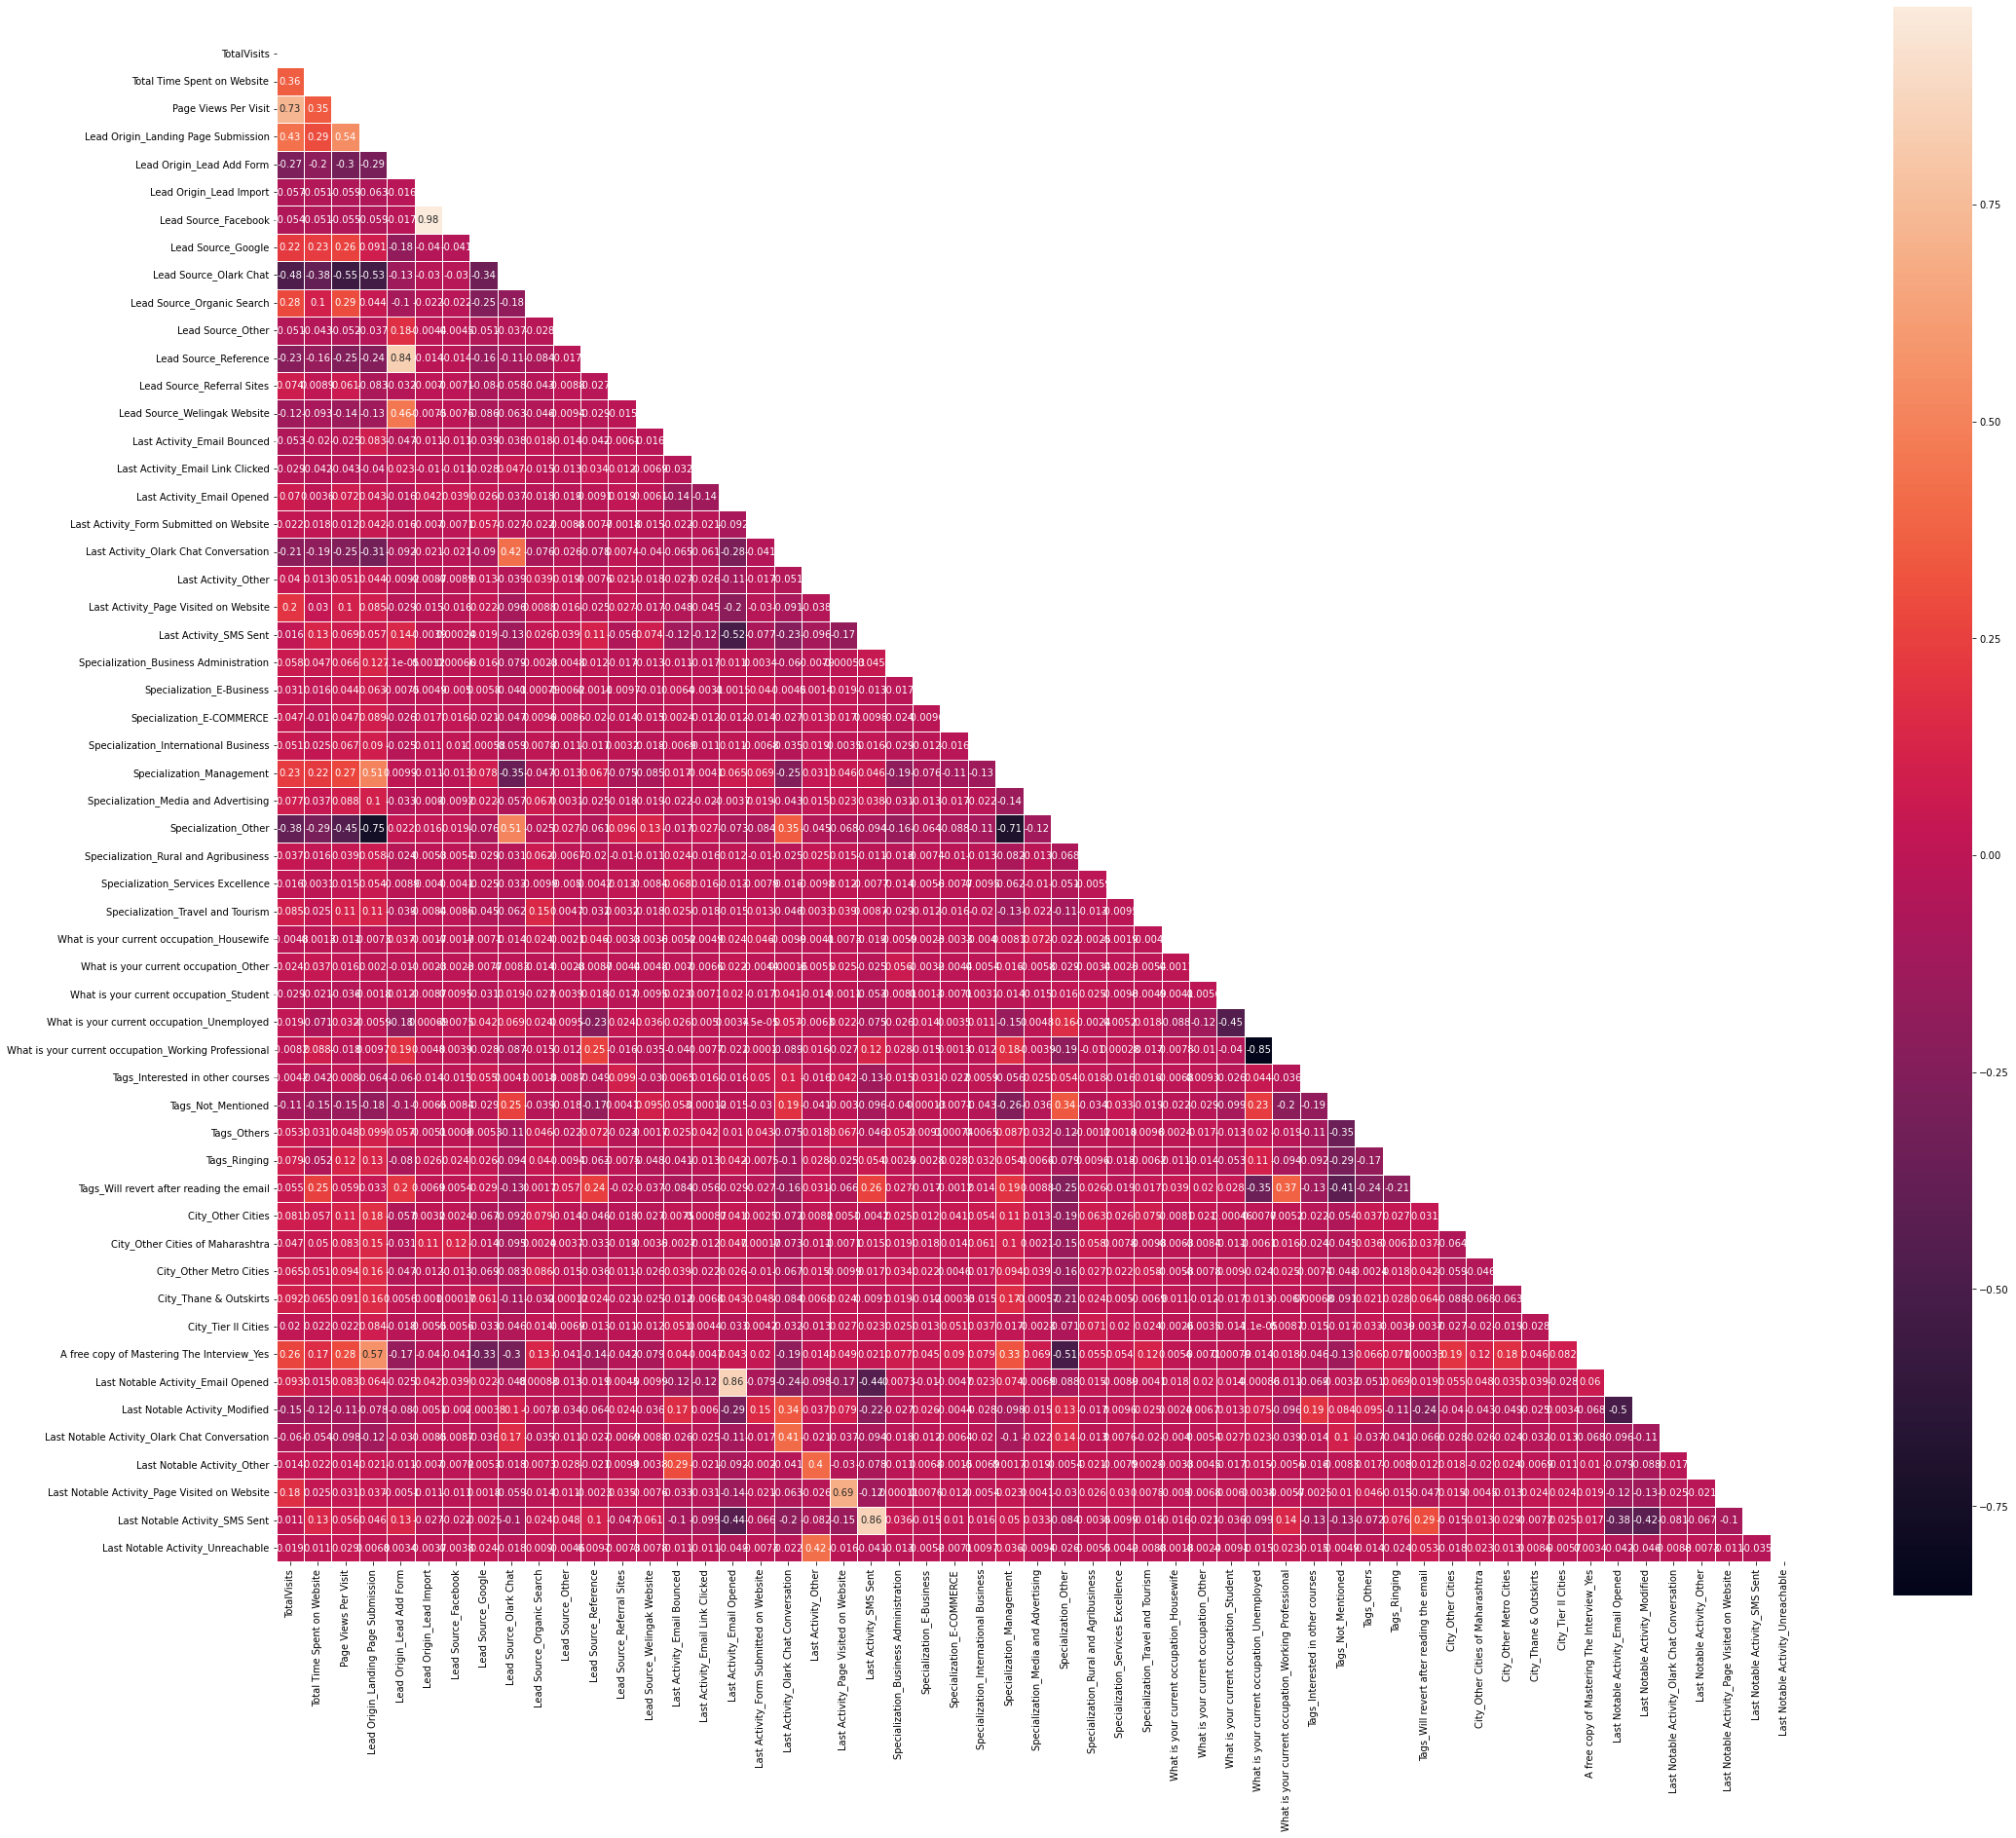

In [76]:
corr= X_train.corr()

# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(corr)

# using the upper triangle matrix as mask 
plt.figure(figsize=(35,30))
sns.heatmap(corr, annot=True, mask=matrix, linewidth=1, linecolor='w', square=True)
plt.show()

##### from above graph plotted we can see the correlated variables. Using RFE, picture will be more clear.

#### 3.4 Model Building

#### 3.4.1. Feature Selection using RFE

In [77]:
logreg = LogisticRegression()

# running RFE with 15 variables as output
rfe = RFE(logreg, 15)             
rfe = rfe.fit(X_train, y_train)

In [78]:
# checking for features selected by rfe
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_Landing Page Submission', False, 14),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 17),
 ('Lead Source_Facebook', False, 41),
 ('Lead Source_Google', False, 23),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 30),
 ('Lead Source_Other', False, 9),
 ('Lead Source_Reference', False, 2),
 ('Lead Source_Referral Sites', False, 16),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 11),
 ('Last Activity_Email Opened', False, 6),
 ('Last Activity_Form Submitted on Website', False, 10),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Other', False, 12),
 ('Last Activity_Page Visited on Website', False, 39),
 ('Last Activity_SMS Sent', False, 5),
 ('Specialization_Business Administration', False, 28),
 ('Special

In [79]:
#list of RFE supported columns
col = X_train.columns[rfe.support_]
col

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_Olark Chat Conversation',
       'Specialization_Travel and Tourism',
       'What is your current occupation_Working Professional',
       'Tags_Not_Mentioned', 'Tags_Others', 'Tags_Ringing',
       'Tags_Will revert after reading the email',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [80]:
# Selecting columns selected by RFE
X_train_RFE = X_train[col]

#### Model 1

In [81]:
X_train_sm = sm.add_constant(X_train_RFE)
lr_1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = lr_1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6251
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1589.3
Date:                Tue, 14 Jun 2022   Deviance:                       3178.6
Time:                        16:47:32   Pearson chi2:                 6.94e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -5.5967      0.366    -15.287      0.000      -6.314      -4.879
TotalVisits                                              1.7342      0.368      4.717      0.000       1.014       2.455
Total Time Spent on Website                              4.5680      0.219     20.845      0.000       4.138       4.997
Page Views Per Visit                                    -1.7835      0.360     -4.961      0.000      -2.488      -1.079
Lead Origin_Lead Add Form                                3.8452      0.320     11.998      0.000       3.217       4.473
Lead Source_Olark Chat                                   1.3309      0.164      8.128      0.000       1.010       1.652
Lead Source_Welingak Website                             2.7985      1.056      2.650      0.008       0.729       4.868
Last Activity_Email Bounced                             -1.6969      0.381     -4.454      0.000      -2.444      -0.950
Last Activity_Olark Chat Conversation                   -1.6151      0.204     -7.902      0.000      -2.016      -1.214
Specialization_Travel and Tourism                       -1.1831      0.381     -3.105      0.002      -1.930      -0.436
What is your current occupation_Working Professional     1.6617      0.308      5.397      0.000       1.058       2.265
Tags_Not_Mentioned                                       2.8741      0.345      8.333      0.000       2.198       3.550
Tags_Others                                              3.3115      0.348      9.517      0.000       2.630       3.994
Tags_Ringing                                            -0.4311      0.413     -1.045      0.296      -1.240       0.378
Tags_Will revert after reading the email                 7.1305      0.380     18.768      0.000       6.386       7.875
Last Notable Activity_SMS Sent                           1.8506      0.111     16.615      0.000       1.632       2.069
========================================================================================================================
"""

In [82]:
## defining function for calculating VIF
def VIF_calculation(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [83]:
VIF_calculation(X_train_RFE)

,Features,VIF
2,Page Views Per Visit,5.69
0,TotalVisits,4.79
13,Tags_Will revert after reading the email,2.92
10,Tags_Not_Mentioned,2.74
1,Total Time Spent on Website,2.36
4,Lead Source_Olark Chat,2.15
3,Lead Origin_Lead Add Form,1.84
11,Tags_Others,1.82
12,Tags_Ringing,1.61
14,Last Notable Activity_SMS Sent,1.56


##### as the VIF for Page views per visit is more, we can drop that variable.

In [84]:
X_train_RFE.drop('Page Views Per Visit', axis = 1, inplace = True)

#### Model 2

In [85]:
X_train_sm = sm.add_constant(X_train_RFE)
lr_2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = lr_2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6252
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1602.0
Date:                Tue, 14 Jun 2022   Deviance:                       3204.1
Time:                        16:47:32   Pearson chi2:                 6.92e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -5.9498      0.363    -16.400      0.000      -6.661      -5.239
TotalVisits                                              0.8345      0.320      2.608      0.009       0.207       1.462
Total Time Spent on Website                              4.5797      0.218     21.013      0.000       4.153       5.007
Lead Origin_Lead Add Form                                4.2111      0.314     13.403      0.000       3.595       4.827
Lead Source_Olark Chat                                   1.6722      0.150     11.141      0.000       1.378       1.966
Lead Source_Welingak Website                             2.7756      1.056      2.629      0.009       0.706       4.845
Last Activity_Email Bounced                             -1.6420      0.381     -4.315      0.000      -2.388      -0.896
Last Activity_Olark Chat Conversation                   -1.5997      0.204     -7.842      0.000      -1.999      -1.200
Specialization_Travel and Tourism                       -1.2523      0.381     -3.284      0.001      -2.000      -0.505
What is your current occupation_Working Professional     1.6888      0.308      5.475      0.000       1.084       2.293
Tags_Not_Mentioned                                       2.8858      0.347      8.325      0.000       2.206       3.565
Tags_Others                                              3.3038      0.350      9.449      0.000       2.618       3.989
Tags_Ringing                                            -0.4577      0.414     -1.106      0.269      -1.269       0.353
Tags_Will revert after reading the email                 7.0808      0.381     18.583      0.000       6.334       7.828
Last Notable Activity_SMS Sent                           1.8081      0.110     16.406      0.000       1.592       2.024
========================================================================================================================
"""

In [86]:
VIF_calculation(X_train_RFE)

,Features,VIF
0,TotalVisits,2.86
12,Tags_Will revert after reading the email,2.71
9,Tags_Not_Mentioned,2.48
1,Total Time Spent on Website,2.35
3,Lead Source_Olark Chat,2.00
2,Lead Origin_Lead Add Form,1.78
10,Tags_Others,1.68
13,Last Notable Activity_SMS Sent,1.56
11,Tags_Ringing,1.46
6,Last Activity_Olark Chat Conversation,1.41


In [87]:
## dropping Tags_Ringing because of its high p-value
X_train_RFE.drop('Tags_Ringing', axis = 1, inplace = True)

#### Model 3

In [88]:
X_train_sm = sm.add_constant(X_train_RFE)
lr_3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = lr_3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6253
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1602.6
Date:                Tue, 14 Jun 2022   Deviance:                       3205.2
Time:                        16:47:32   Pearson chi2:                 6.87e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -6.2679      0.243    -25.816      0.000      -6.744      -5.792
TotalVisits                                              0.8218      0.320      2.571      0.010       0.195       1.448
Total Time Spent on Website                              4.5793      0.218     21.009      0.000       4.152       5.007
Lead Origin_Lead Add Form                                4.1859      0.312     13.425      0.000       3.575       4.797
Lead Source_Olark Chat                                   1.6702      0.150     11.133      0.000       1.376       1.964
Lead Source_Welingak Website                             2.7959      1.055      2.650      0.008       0.728       4.864
Last Activity_Email Bounced                             -1.6446      0.381     -4.319      0.000      -2.391      -0.898
Last Activity_Olark Chat Conversation                   -1.5990      0.204     -7.835      0.000      -1.999      -1.199
Specialization_Travel and Tourism                       -1.2500      0.381     -3.278      0.001      -1.997      -0.503
What is your current occupation_Working Professional     1.7155      0.311      5.521      0.000       1.107       2.325
Tags_Not_Mentioned                                       3.2116      0.207     15.535      0.000       2.806       3.617
Tags_Others                                              3.6295      0.212     17.145      0.000       3.215       4.044
Tags_Will revert after reading the email                 7.4030      0.264     27.998      0.000       6.885       7.921
Last Notable Activity_SMS Sent                           1.7895      0.109     16.473      0.000       1.577       2.002
========================================================================================================================
"""

In [89]:
VIF_calculation(X_train_RFE)

,Features,VIF
0,TotalVisits,2.35
11,Tags_Will revert after reading the email,2.31
1,Total Time Spent on Website,2.30
9,Tags_Not_Mentioned,2.10
3,Lead Source_Olark Chat,1.83
2,Lead Origin_Lead Add Form,1.71
10,Tags_Others,1.49
12,Last Notable Activity_SMS Sent,1.47
6,Last Activity_Olark Chat Conversation,1.41
4,Lead Source_Welingak Website,1.36


#### Model 4

In [90]:
X_train_RFE.drop('Specialization_Travel and Tourism', axis = 1, inplace = True)

In [91]:
X_train_sm = sm.add_constant(X_train_RFE)
lr_4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = lr_4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6254
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1608.6
Date:                Tue, 14 Jun 2022   Deviance:                       3217.2
Time:                        16:47:32   Pearson chi2:                 6.86e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -6.2770      0.243    -25.875      0.000      -6.752      -5.802
TotalVisits                                              0.7859      0.318      2.471      0.013       0.162       1.409
Total Time Spent on Website                              4.5882      0.218     21.087      0.000       4.162       5.015
Lead Origin_Lead Add Form                                4.2074      0.311     13.518      0.000       3.597       4.817
Lead Source_Olark Chat                                   1.6861      0.150     11.252      0.000       1.392       1.980
Lead Source_Welingak Website                             2.7925      1.055      2.647      0.008       0.725       4.860
Last Activity_Email Bounced                             -1.6438      0.378     -4.344      0.000      -2.385      -0.902
Last Activity_Olark Chat Conversation                   -1.5857      0.204     -7.790      0.000      -1.985      -1.187
What is your current occupation_Working Professional     1.7127      0.309      5.545      0.000       1.107       2.318
Tags_Not_Mentioned                                       3.2033      0.207     15.505      0.000       2.798       3.608
Tags_Others                                              3.6130      0.211     17.088      0.000       3.199       4.027
Tags_Will revert after reading the email                 7.3562      0.263     27.974      0.000       6.841       7.872
Last Notable Activity_SMS Sent                           1.7921      0.108     16.533      0.000       1.580       2.005
========================================================================================================================
"""

In [92]:
VIF_calculation(X_train_RFE)

,Features,VIF
0,TotalVisits,2.34
1,Total Time Spent on Website,2.30
10,Tags_Will revert after reading the email,2.30
8,Tags_Not_Mentioned,2.10
3,Lead Source_Olark Chat,1.83
2,Lead Origin_Lead Add Form,1.71
9,Tags_Others,1.49
11,Last Notable Activity_SMS Sent,1.47
6,Last Activity_Olark Chat Conversation,1.41
4,Lead Source_Welingak Website,1.36


#### Model 5

In [93]:
X_train_RFE.drop('TotalVisits', axis = 1, inplace = True)

In [94]:
X_train_sm = sm.add_constant(X_train_RFE)
lr_5 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = lr_5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6255
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1611.6
Date:                Tue, 14 Jun 2022   Deviance:                       3223.3
Time:                        16:47:32   Pearson chi2:                 6.81e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -6.0970      0.230    -26.531      0.000      -6.547      -5.647
Total Time Spent on Website                              4.6386      0.217     21.387      0.000       4.213       5.064
Lead Origin_Lead Add Form                                4.0297      0.302     13.327      0.000       3.437       4.622
Lead Source_Olark Chat                                   1.5246      0.133     11.423      0.000       1.263       1.786
Lead Source_Welingak Website                             2.7970      1.055      2.650      0.008       0.729       4.865
Last Activity_Email Bounced                             -1.7128      0.376     -4.555      0.000      -2.450      -0.976
Last Activity_Olark Chat Conversation                   -1.5879      0.203     -7.838      0.000      -1.985      -1.191
What is your current occupation_Working Professional     1.7003      0.308      5.524      0.000       1.097       2.304
Tags_Not_Mentioned                                       3.2068      0.207     15.523      0.000       2.802       3.612
Tags_Others                                              3.6199      0.211     17.124      0.000       3.206       4.034
Tags_Will revert after reading the email                 7.3665      0.263     28.022      0.000       6.851       7.882
Last Notable Activity_SMS Sent                           1.7762      0.108     16.425      0.000       1.564       1.988
========================================================================================================================
"""

In [95]:
VIF_calculation(X_train_RFE)

,Features,VIF
9,Tags_Will revert after reading the email,2.14
0,Total Time Spent on Website,2.04
7,Tags_Not_Mentioned,1.77
2,Lead Source_Olark Chat,1.71
1,Lead Origin_Lead Add Form,1.65
10,Last Notable Activity_SMS Sent,1.46
5,Last Activity_Olark Chat Conversation,1.40
3,Lead Source_Welingak Website,1.36
8,Tags_Others,1.31
6,What is your current occupation_Working Profes...,1.29


##### all p-values and VIF are in the range, hence we can fix the model.

In [96]:
# Predicting the probabilities on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

9196    0.217766
4696    0.032681
3274    0.298018
2164    0.001025
1667    0.974721
7024    0.203340
8018    0.049573
778     0.066412
6942    0.073078
4440    0.092300
dtype: float64

In [97]:
# Reshaping to an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.21776572, 0.03268081, 0.29801793, 0.00102452, 0.97472054,
       0.20334017, 0.04957345, 0.06641219, 0.07307763, 0.09230008])

In [98]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
#y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob
0,1,0.217766
1,0,0.032681
2,0,0.298018
3,0,0.001025
4,1,0.974721


In [99]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,1,0.217766,0
1,0,0.032681,0
2,0,0.298018,0
3,0,0.001025,0
4,1,0.974721,1


#### 4. Model Evaluation

#### 4.1 Confusion Matrix

In [100]:
Confusion = confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
Confusion

array([[3654,  228],
       [ 423, 1962]], dtype=int64)

#### Actual/Predicted
                        Not Converted    Converted
     Not Converted          3654           228
     Converted              423            1962 

In [101]:
## Checking the overall accuracy.
accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.8961225466730494

#### Accuracy is around 89.61% qhich is very good value

In [102]:
print(classification_report( y_train_pred_final.Converted, y_train_pred_final.Predicted ))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      3882
           1       0.90      0.82      0.86      2385

    accuracy                           0.90      6267
   macro avg       0.90      0.88      0.89      6267
weighted avg       0.90      0.90      0.90      6267



In [103]:
# true positive
TP = Confusion[1,1]
# true negatives
TN = Confusion[0,0]
# false positives
FP = Confusion[0,1] 
# false negatives
FN = Confusion[1,0]

#### Sensitivity

In [104]:
TP / float(TP+FN)

0.8226415094339623

#### Specificity

In [105]:
TN / float(TN+FP)

0.9412673879443586

#### False Positive Rate - predicting converted when customer does not have converted 

In [106]:
print(FP/ float(TN+FP))

0.05873261205564142


#### Positive predictive value

In [107]:
print (TP / float(TP+FP))

0.8958904109589041


#### Negative predictive value

In [108]:
print (TN / float(TN+ FN))

0.8962472406181016


#### ROC curve plotting

In [109]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [110]:
fpr, tpr, thresholds = roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False)

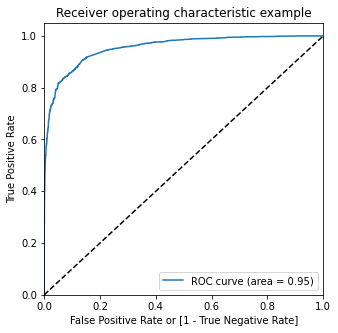

In [111]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

#### from the above graph we can see that we are getting good value of ROC curve area = 0.95, which shouls be close to 1. Hence, it indicates good predictive model.

#### 5. Optimal Cut-off Point

##### for above we had chosen the arbitrary cutoff point as 0.5. But it is necessary to find out the optimal cut off point

In [112]:
number = [float(x)/10 for x in range(10)]
for i in number:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.217766,0,1,1,1,0,0,0,0,0,0,0
1,0,0.032681,0,1,0,0,0,0,0,0,0,0,0
2,0,0.298018,0,1,1,1,0,0,0,0,0,0,0
3,0,0.001025,0,1,0,0,0,0,0,0,0,0,0
4,1,0.974721,1,1,1,1,1,1,1,1,1,1,1


In [113]:
### checking accuracy sensitivity and specificity for various probable cutoffs
df_cutoff = pd.DataFrame( columns = ['Prob','Accuracy','Sensi','Speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm_1 = confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total_1=sum(sum(cm_1))
    accuracy = (cm_1[0,0]+cm_1[1,1])/total_1
    speci = cm_1[0,0]/(cm_1[0,0]+cm_1[0,1])
    sensi = cm_1[1,1]/(cm_1[1,0]+cm_1[1,1])
    df_cutoff.loc[i] =[ i ,accuracy,sensi,speci]
df_cutoff

,Prob,Accuracy,Sensi,Speci
0.0,0.0,0.380565,1.000000,0.000000
0.1,0.1,0.782831,0.963103,0.672076
0.2,0.2,0.842189,0.943396,0.780010
0.3,0.3,0.881442,0.888050,0.877383
0.4,0.4,0.888942,0.856184,0.909067
0.5,0.5,0.896123,0.822642,0.941267
0.6,0.6,0.895165,0.791195,0.959042
0.7,0.7,0.881921,0.729979,0.975270
0.8,0.8,0.869156,0.685115,0.982226
0.9,0.9,0.839317,0.592453,0.990984


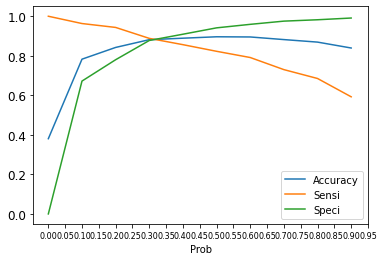

In [114]:
# plotting the graph of accuracy, sensitivity and specificity for different probabilities
df_cutoff.plot.line(x='Prob', y=['Accuracy','Sensi','Speci'])
plt.xticks(np.arange(0,1,step=0.05), size = 8)
plt.yticks(size=12)
plt.show()

#### from the above point we can see that, 0.3 is optimal cutoff point for probability. Hence calculating with value of 0.3

In [115]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.3 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.217766,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.032681,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.298018,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.001025,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0.974721,1,1,1,1,1,1,1,1,1,1,1,1


In [116]:
## checking the accuracy for new cutoff point
accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8814424764640179

In [117]:
Confusion_new = confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
Confusion_new

array([[3406,  476],
       [ 267, 2118]], dtype=int64)

In [118]:
# true positive
TP = Confusion_new[1,1]
# true negatives
TN = Confusion_new[0,0]
# false positives
FP = Confusion_new[0,1] 
# false negatives
FN = Confusion_new[1,0]

In [119]:
## Sensitivity
TP / float(TP+FN)

0.8880503144654088

In [120]:
# specificity
TN / float(TN+FP)

0.8773827923750644

In [121]:
# Calculate False Postive Rate
print(FP/ float(TN+FP))

0.1226172076249356


In [122]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8164996144949884


In [123]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9273073781649878


#### Precision

In [124]:
## Precision - TP/TP+FP
Confusion_new[1,1]/(Confusion_new[0,1]+Confusion_new[1,1])

0.8164996144949884

#### Recall

In [125]:
Confusion_new[1,1]/(Confusion_new[1,0]+Confusion_new[1,1])

0.8880503144654088

In [126]:
### precision using Scikit library
precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8164996144949884

In [127]:
### recall using Scikit library
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8880503144654088

#### Precision and Recall Tradeoff

In [128]:
# plotting the curve, precision - recall curve
y_train_pred_final.Converted, y_train_pred_final.final_predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

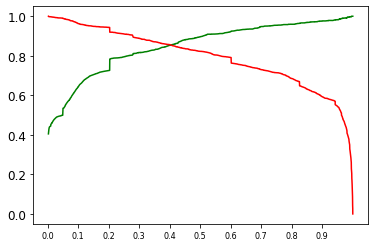

In [129]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.xticks(np.arange(0,1,step=0.1),size=8)
plt.yticks(size=12)
plt.show()

##### precision and Recall seem to have trade-off at .41, hence 0.41 will be used as threshold on data

In [130]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.217766,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.032681,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.298018,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.001025,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0.974721,1,1,1,1,1,1,1,1,1,1,1,1


In [131]:
#accuracy
accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8891016435295995

In [132]:
# Creating confusion matrix
confusion_tradeoff = confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion_tradeoff

array([[3543,  339],
       [ 356, 2029]], dtype=int64)

In [133]:
# true positive
TP = confusion_tradeoff[1,1]
# true negatives
TN = confusion_tradeoff[0,0]
# false positives
FP = confusion_tradeoff[0,1] 
# false negatives
FN = confusion_tradeoff[1,0]

In [134]:
# Precision
TP / (TP + FP)

0.8568412162162162

In [135]:
#Recall
TP / (TP + FN)

0.8507337526205451

#### With the current cut off as 0.41 we have Precision around 86% and Recall around 85%

#### 6. Prediction on Test set

In [136]:
##Scaling numeric values
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [137]:
col = X_train_RFE.columns
X_test = X_test[col]
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test[col])
X_test_sm
X_test_sm

,const,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation,What is your current occupation_Working Professional,Tags_Not_Mentioned,Tags_Others,Tags_Will revert after reading the email,Last Notable Activity_SMS Sent
7681,1.0,0.136884,0,0,0,0,0,0,0,0,0,1
984,1.0,0.080546,0,0,0,0,0,0,0,0,0,0
8135,1.0,0.401849,0,0,0,0,0,0,1,0,0,1
6915,1.0,0.062060,0,0,0,0,0,0,0,0,0,0
2712,1.0,0.110915,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9029,1.0,0.000000,0,1,0,0,1,0,1,0,0,0
1420,1.0,0.174736,0,0,0,0,1,0,1,0,0,0
5996,1.0,0.136884,0,0,0,0,0,0,0,1,0,0
4143,1.0,0.036092,0,0,0,0,0,0,0,0,0,0


In [138]:
y_test_pred = res.predict(X_test_sm)

# Coverting it into df
y_pred_df = pd.DataFrame(y_test_pred)

# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [139]:
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [140]:
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)

In [141]:
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.024463
1,0,0.003258
2,0,0.679181
3,0,0.002991
4,1,0.856198


In [142]:
# prediction using cut off 0.3
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.3 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.024463,0
1,0,0.003258,0
2,0,0.679181,1
3,0,0.002991,0
4,1,0.856198,1
...,...,...,...
2681,1,0.049573,0
2682,0,0.024902,0
2683,1,0.136799,0
2684,0,0.002653,0


In [143]:
# overall accuracy.
accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8823529411764706

In [144]:
confusion_test = confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion_test

array([[1480,  196],
       [ 120,  890]], dtype=int64)

In [145]:
# true positive
TP = confusion_test[1,1]
# true negatives
TN = confusion_test[0,0]
# false positives
FP = confusion_test[0,1]
# false negatives
FN = confusion_test[1,0]

In [146]:
#sensitivity
TP / float(TP+FN)

0.8811881188118812

In [147]:
#specificity
TN / float(TN+FP)

0.883054892601432

In [148]:
# precision score
precision_score(y_pred_final.Converted , y_pred_final.final_predicted)

0.8195211786372008

In [149]:
# recall score
recall_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8811881188118812

#### Lead Score

In [150]:
#calculating lead score
y_pred_final['lead_score']=(y_pred_final['Conversion_Prob']*100).astype("int64")
y_pred_final.sort_values(by='lead_score',ascending=False)

,Converted,Conversion_Prob,final_predicted,lead_score
816,1,0.995030,1,99
1388,1,0.999846,1,99
2176,1,0.995286,1,99
1384,1,0.997780,1,99
787,1,0.997749,1,99
...,...,...,...,...
1010,0,0.007108,0,0
1761,0,0.001116,0,0
1013,0,0.002107,0,0
1018,0,0.000715,0,0


### Observation for Test Data

#### Accuracy : 88.23%
#### Sensitivity : 88.11%
#### Specificity : 88.30%

### Final Observation of Model

### Train Data: 
#### Accuracy : 88.14%
#### Sensitivity : 88.80%
#### Specificity :87.73%

### Test Data: 
#### Accuracy : 88.23%
#### Sensitivity : 88.11%
#### Specificity : 88.30%

### Conclusion

The variables that mattered the most to get converted into leads are:

1. The total time spent on the Website - Hence, the website should be made more engaging.
2. When the lead source is:
    a. Olark chat
    b. Welingak website
    Hence, education company should focus more on these lead source
3. When the last activity was:
    a. SMS sent
    b. Olark chat conversation
4. When the lead origin is Lead add format.
5. When their current occupation is as a working professional.

#### Model is able to learn and predict the Conversion Rate well and this will help X education company to increase their potential leads and conversion rate by taking proper measures.